规则：赌徒和庄家玩投硬币，正面在上，赌徒赢，反面在上，庄家赢，输家付给赢家1个金币，赌徒初始有10个金币，有10000个参与，最高100轮，输光者推出赌局

In [39]:
# 主要使用pandas和numpy
import pandas as pd
import numpy as np

In [40]:
# 人数
person_num = 100
# 游戏次数
play_times = 100
# 玩家本金
money = 10
# 游戏结果
log = []

In [41]:
# 遍历人数代表每个人单独计算游戏结果
for person in range(1,person_num+1):
    # 每个人重置本金
    money = 10
    # 遍历游戏次数，每次单独计算结果
    for time in range(1,play_times+1):
        result = np.random.choice([0,1])
        # result=1代表正面，玩家金币加1，result=0代表反面，玩家金币减1，金币归0，玩家游戏结束
        if result == 1:
            money+=1
        elif result == 0:
            money-=1
        if money == 0:
            break
    # 记录玩家游戏结果
    log.append([person,time,money])

In [42]:
# 数据转化为dataframe格式方便计算
df = pd.DataFrame(log,columns=['person','time','money'])
# 重新设置索引
df.set_index('person',inplace=True)
df.head()

,time,money
person,,
1,100,10
2,100,20
3,100,18
4,26,0
5,100,18


In [43]:
# 输光提前出局的人
money_0 = df.query('money==0&time<@play_times').shape[0]
money_0

38

In [47]:
# 赌满全场且赚钱的人
money_1 = df.query('money>=@money&time==@play_times').shape[0]
money_1

62

In [48]:
# 赌满全场且亏欠钱的人
money_2 = df.query('money<@money&time==@play_times').shape[0]
money_2

0

In [49]:
print(f'总轮数：{play_times}，总人数：{person_num}')
print(f'输光提前出局的人：{money_0}')
print(f'赌满全场且赚钱的人：{money_1}')
print(f'赌满全场且亏欠钱的人：{money_2}')

总轮数：100，总人数：100
输光提前出局的人：38
赌满全场且赚钱的人：62
赌满全场且亏欠钱的人：0


In [51]:
import pandas as pd
import numpy as np

def gamble(person_num,play_times,gold):
    log = []
    for person in range(1,person_num+1):
        money = gold
        for time in range(1,play_times+1):
            result = np.random.choice([0,1])
            if result == 1:
                money+=1
            elif result == 0:
                money-=1
            if money == 0:
                break
        log.append([person,time,money])
    df = pd.DataFrame(log,columns=['person','time','money'])
    money_0 = df.query('money==0&time<@play_times').shape[0]
    money_1 = df.query('money>=@gold&time==@play_times').shape[0]
    money_2 = df.query('money<@gold&time==@play_times').shape[0]
    
    print(f'总人数：{person_num}，总轮数：{play_times}，初始金币：{gold}')
    print(f'输光提前出局的人：{money_0}')
    print(f'赌满全场且赚钱的人：{money_1}')
    print(f'赌满全场且亏欠钱的人：{money_2}')

In [52]:
gamble(100,100,10)

总人数：100，总轮数：100，初始金币：10
输光提前出局的人：40
赌满全场且赚钱的人：43
赌满全场且亏欠钱的人：17


In [53]:
gamble(100,1000,10)

总人数：100，总轮数：1000，初始金币：10
输光提前出局的人：79
赌满全场且赚钱的人：20
赌满全场且亏欠钱的人：1


In [54]:
gamble(100,10000,10)

总人数：100，总轮数：10000，初始金币：10
输光提前出局的人：90
赌满全场且赚钱的人：10
赌满全场且亏欠钱的人：0


In [55]:
gamble(100,100000,10)

总人数：100，总轮数：100000，初始金币：10
输光提前出局的人：98
赌满全场且赚钱的人：2
赌满全场且亏欠钱的人：0


In [56]:
gamble(1000,100,10)

总人数：1000，总轮数：100，初始金币：10
输光提前出局的人：316
赌满全场且赚钱的人：513
赌满全场且亏欠钱的人：171


In [57]:
gamble(10000,100,10)

总人数：10000，总轮数：100，初始金币：10
输光提前出局的人：3128
赌满全场且赚钱的人：5105
赌满全场且亏欠钱的人：1767


In [58]:
gamble(100,100,10)

总人数：100，总轮数：100，初始金币：10
输光提前出局的人：34
赌满全场且赚钱的人：51
赌满全场且亏欠钱的人：15


In [59]:
gamble(1000,100,10)

总人数：1000，总轮数：100，初始金币：10
输光提前出局的人：336
赌满全场且赚钱的人：516
赌满全场且亏欠钱的人：148


In [60]:
gamble(10000,100,10)

总人数：10000，总轮数：100，初始金币：10
输光提前出局的人：3119
赌满全场且赚钱的人：5129
赌满全场且亏欠钱的人：1752


In [72]:
gamble(1000,1000,10)

总人数：1000，总轮数：1000，初始金币：10
输光提前出局的人：739
赌满全场且赚钱的人：254
赌满全场且亏欠钱的人：7


In [73]:
gamble(1000,1000,100)

总人数：1000，总轮数：1000，初始金币：100
输光提前出局的人：2
赌满全场且赚钱的人：506
赌满全场且亏欠钱的人：492


In [74]:
gamble(1000,1000,500)

总人数：1000，总轮数：1000，初始金币：500
输光提前出局的人：0
赌满全场且赚钱的人：514
赌满全场且亏欠钱的人：486


现象：此次测试，自变量有三个，游戏次数，参与人数，持有金币  
* 参与人数的变化对实现结果影响不大，不予考虑  
* 参与人数和持有金币相同的情况下，游戏次数越多玩家获胜的概率越低  
* 参与人数和游戏次数相同的情况下，持有金币越多玩家获胜的概率越高，但是不会无限提高，最终恒定在50%左右

结论：十赌九输，即使是这种公平的投硬币比赛，只要赌博的次数足够多，大部分人都会输的倾家荡产，更不要说大部分赌博都不是公平的，庄家还会有抽水
。大部分人玩下去，最后结果都是倾家荡产。因为庄家的本金对于赌徒而言几乎是无限的，他可以输很多次，但是你输不起。

In [ ]:
拓展：图像展示

In [75]:
import pandas as pd
import numpy as np

def gamble(person_num,play_times,gold):
    data = []
    log = []
    for person in range(1,person_num+1):
        money = gold
        for time in range(1,play_times+1):
            result = np.random.choice([0,1])
            if result == 1:
                money+=1
            elif result == 0:
                money-=1
            if money == 0:
                break
        log.append([person,time,money])
    df = pd.DataFrame(log,columns=['person','time','money'])
    money_0 = df.query('money==0&time<@play_times').shape[0]
    money_1 = df.query('money>=@gold&time==@play_times').shape[0]
    money_2 = df.query('money<@gold&time==@play_times').shape[0]

    data=[money_0,money_1,money_2]
    return data

<Figure size 432x288 with 0 Axes>

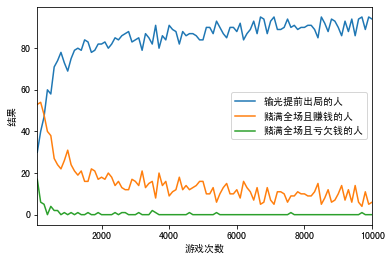

In [76]:
data_list = []
times = np.linspace(100,10000,100)
for i in times:
    data_list.append(gamble(100,int(i),10))
df = pd.DataFrame(data_list,columns=list('ABC'),index=times)

import matplotlib.pyplot as plt
figure = plt.figure()
df.plot(xlabel='游戏次数',ylabel='结果')
plt.xlim([100,10000])
plt.legend(['输光提前出局的人','赌满全场且赚钱的人','赌满全场且亏欠钱的人'])